In [5]:
import logging
import os
from datetime import datetime

In [6]:
datetime.now()

datetime.datetime(2023, 10, 29, 11, 29, 40, 235356)

In [7]:
f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"

'10_29_2023_11_29_40.log'

In [8]:
os.path.join(os.getcwd(), "logs")

'c:\\Users\\abpaul\\Documents\\Learnings\\iNeuron\\MLProjects\\fsdsm_end2end\\notebooks\\logs'

In [6]:
from src.GemstonePricePrediction.logger import logging
logging.info("i have just tested the things")

In [10]:
import sys


class CustomException(Exception):
    def __init__(self, error_message, error_details: sys):
        self.error_message = error_message
        _, _, exc_tb = error_details.exc_info()

        self.line_no = exc_tb.tb_lineno
        self.file_name = exc_tb.tb_frame.f_code.co_filename

    def __str__(self):
        return "File name [{0}] Line Number [{1}] Error Message [{2}]".format(self.file_name, self.line_no, str(self.error_message))

In [11]:
try:
        a = 1/0
except Exception as e:
    print(sys.exc_info())
    raise CustomException(e, sys)

(<class 'ZeroDivisionError'>, ZeroDivisionError('division by zero'), <traceback object at 0x0000029426BB2280>)


CustomException: File name [C:\Users\abpaul\AppData\Local\Temp\ipykernel_16104\1418207102.py] Line Number [2] Error Message [division by zero]

In [8]:
import os
os.makedirs(os.path.dirname(os.path.join("artifacts", "raw.csv")), exist_ok=True)

[01:37:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


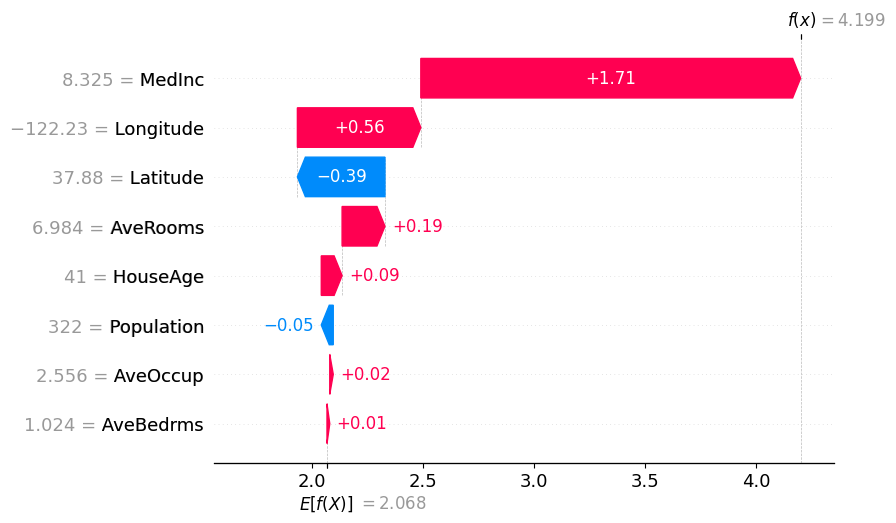

In [17]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)
# print(shap_values)

# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values)
shap.plots.waterfall(shap_values[0])

In [4]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [5]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

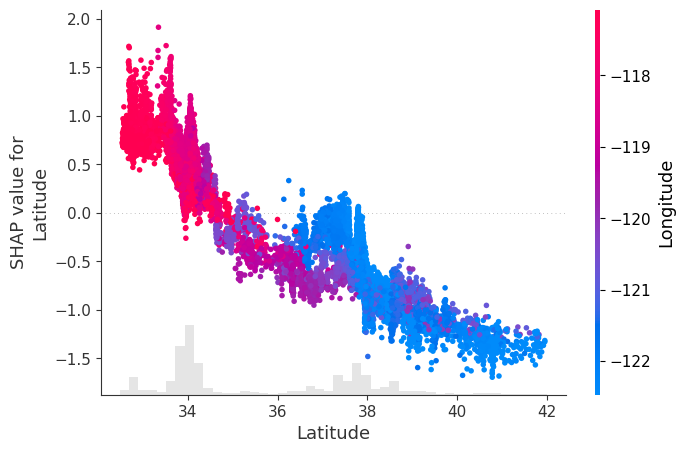

In [6]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

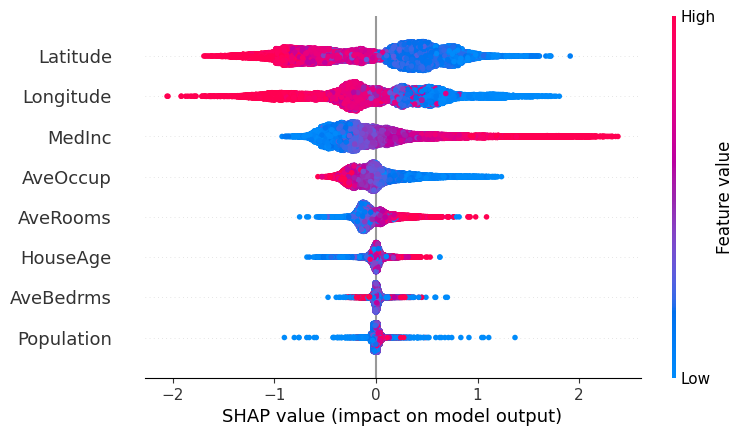

In [7]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

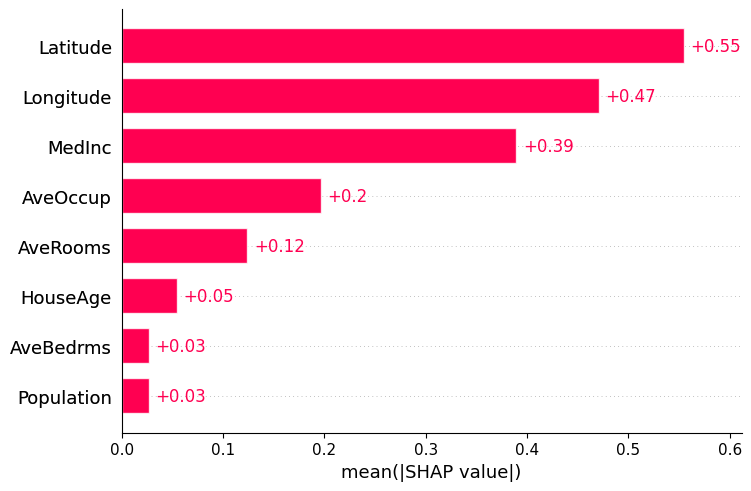

In [8]:
shap.plots.bar(shap_values)